In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Overview

In [3]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (1599, 12) 

----------------------------------------
Values: 

 [[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]] 

----------------------------------------
Columns: 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

----------------------------------------
Short data analyse: 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Wine data set')
print()
print (missing_values (df))

Missing Values from Wine data set

                      Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total sulfur dioxide      0      0.0
free sulfur dioxide       0      0.0
chlorides                 0      0.0
residual sugar            0      0.0
citric acid               0      0.0
volatile acidity          0      0.0
fixed acidity             0      0.0


In [6]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


In [7]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

Empty DataFrame
Columns: []
Index: [0, 1, 2]


(12.5, -0.5)

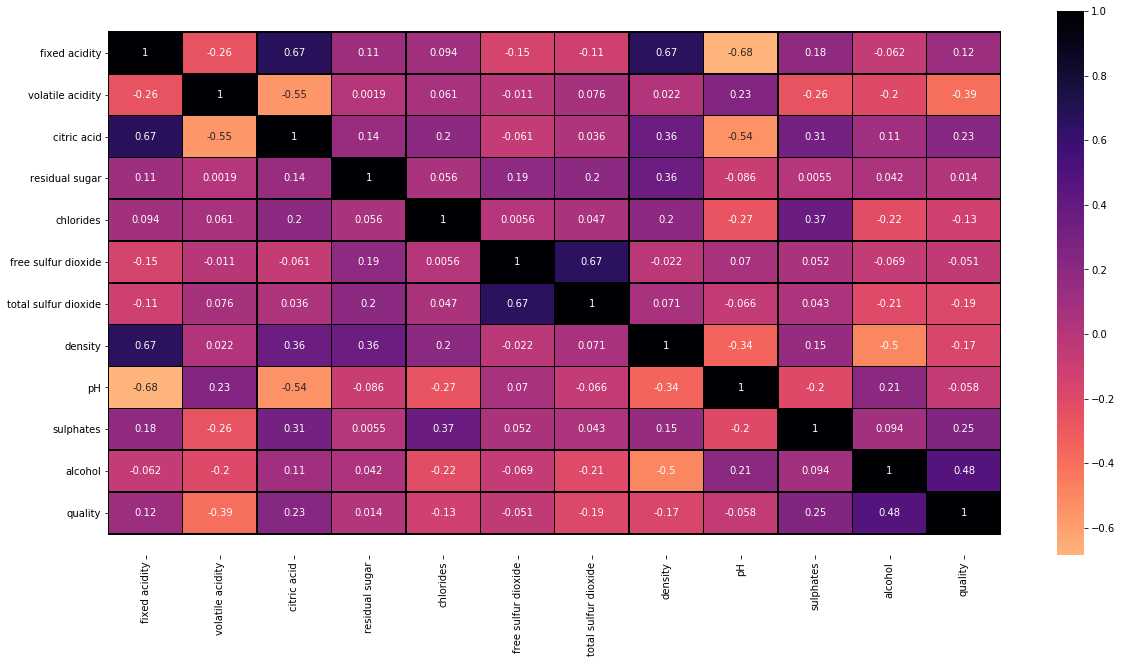

In [8]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='magma_r',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Data Visualization

In [10]:
num_cols= [col_name for col_name in df]
len(num_cols)

12

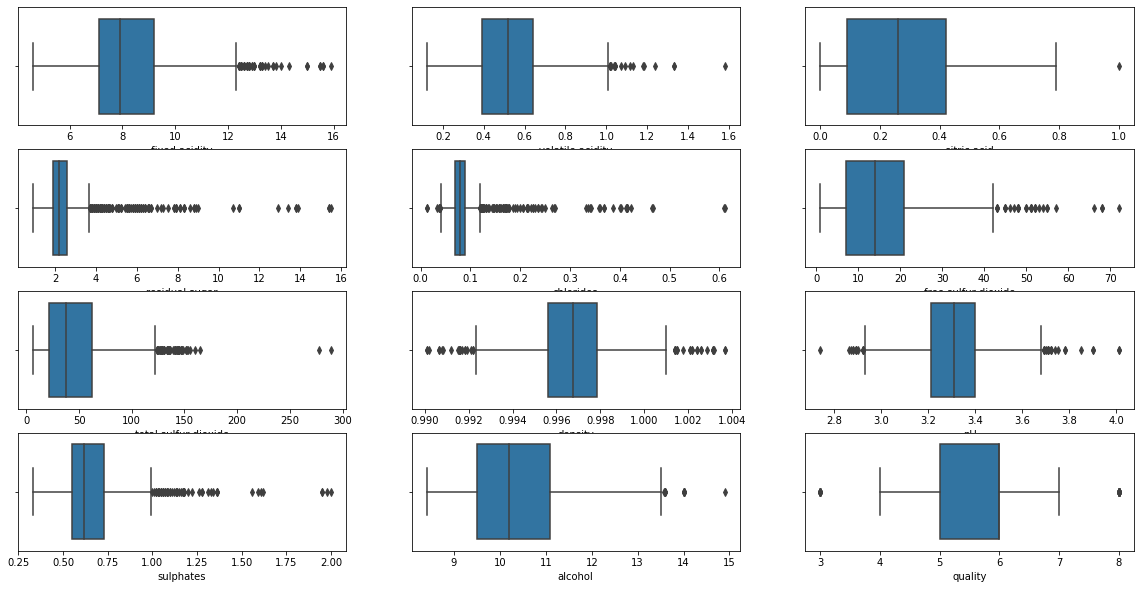

In [11]:
# Let see some visualisation of features

plain_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))
start = 0
for j in range(4):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.boxplot(x=plain_features[start], data=df, ax=ax[j, i])
        start += 1


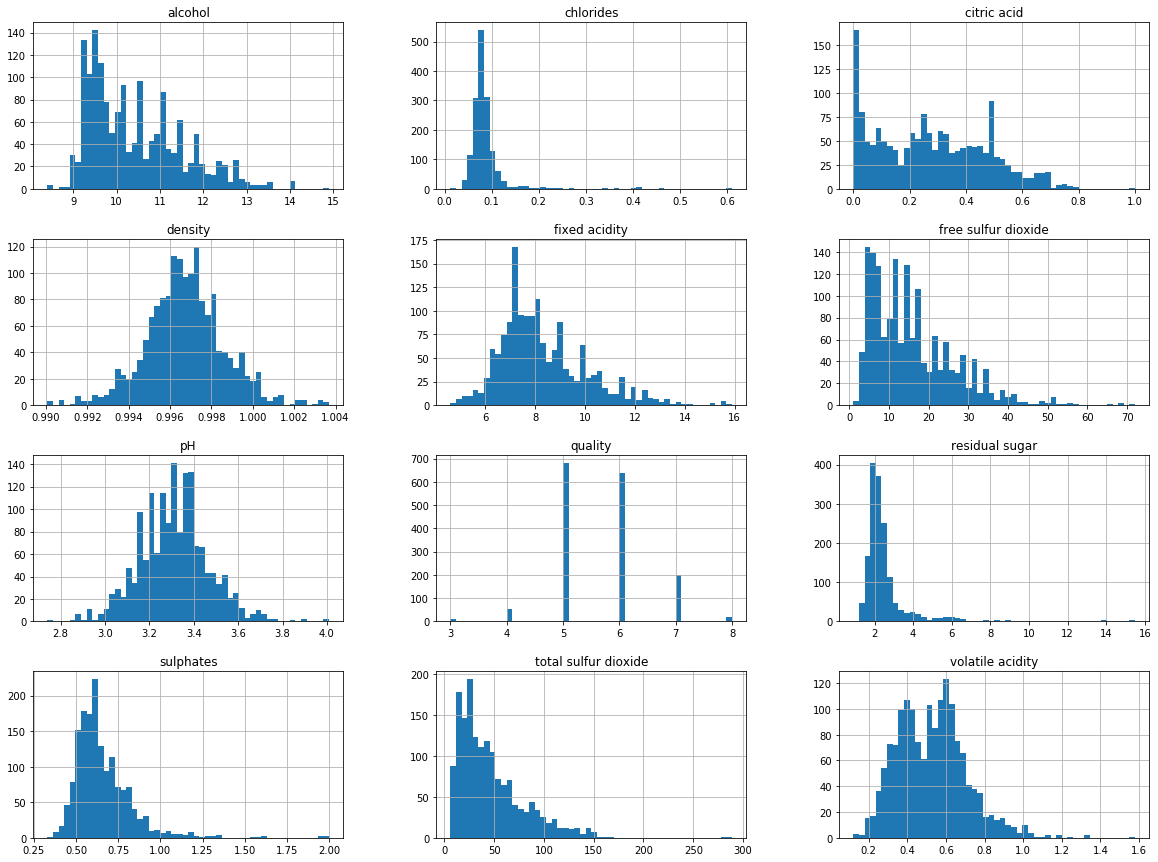

In [12]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

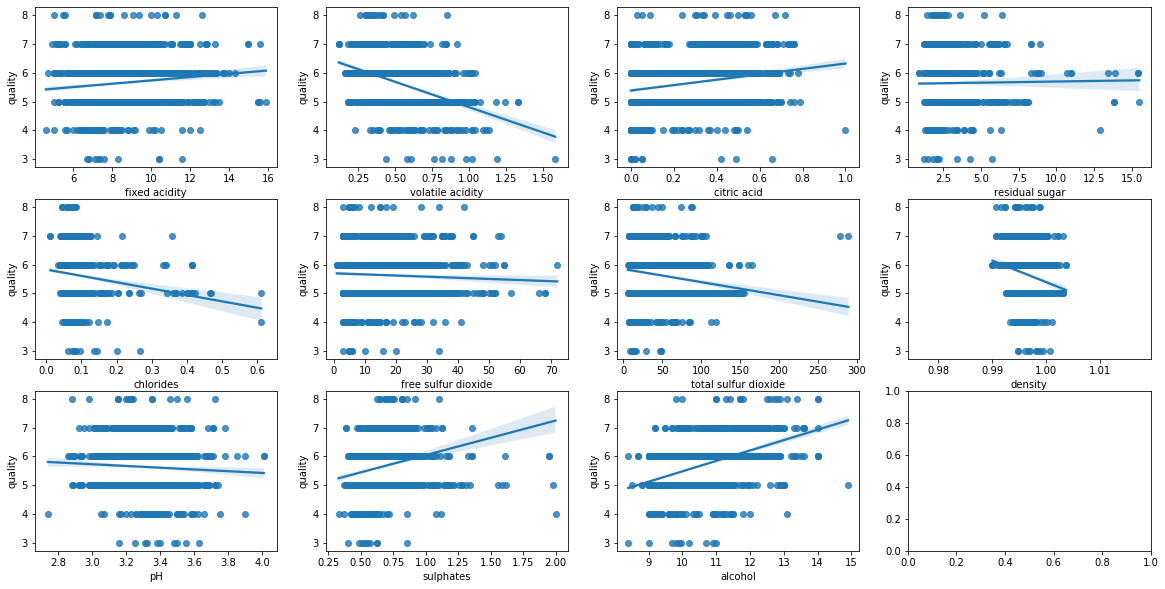

In [13]:
plain_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
start = 0
for j in range(3):
    for i in range(4):
        if start == len(plain_features):
            break
        sns.regplot(x=plain_features[start],
                    y= 'quality', data=df, ax=ax[j, i])
        start += 1

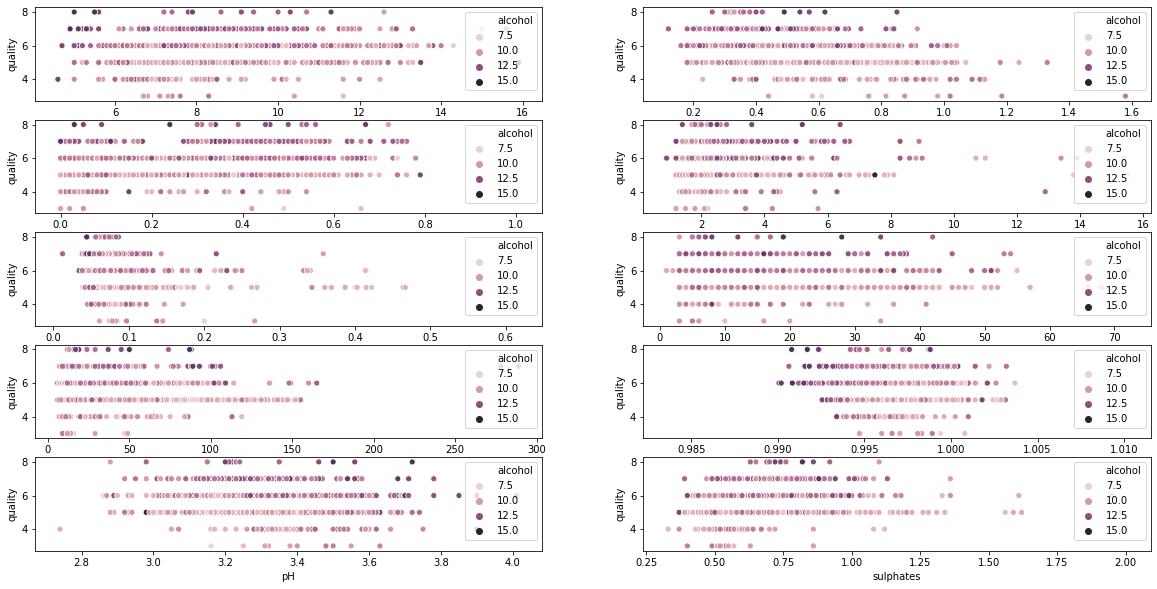

In [14]:
plain_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
start = 0
for j in range(5):
    for i in range(2):
        if start == len(plain_features):
            break
        sns.scatterplot(x=plain_features[start],
                    y='quality', data=df, hue='alcohol', ax=ax[j, i])
        start += 1

In [15]:
# Assining X and y variables

X = df.drop(['quality'], axis = 1)
y = df['quality']
display(X.head(5))
display(y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [16]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1199, 11)
y_train shape: (1199,)
X_test shape: (400, 11)
y_test shape: (400,)


In [18]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [19]:
# transform testing dataabs
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.330357,0.428082,0.11,0.068493,0.130217,0.211268,0.201413,0.472100,0.354331,0.276074,0.184615
1,0.258929,0.212329,0.29,0.082192,0.105175,0.253521,0.212014,0.522026,0.519685,0.165644,0.169231
2,0.330357,0.301370,0.04,0.075342,0.116861,0.126761,0.056537,0.552863,0.377953,0.042945,0.184615


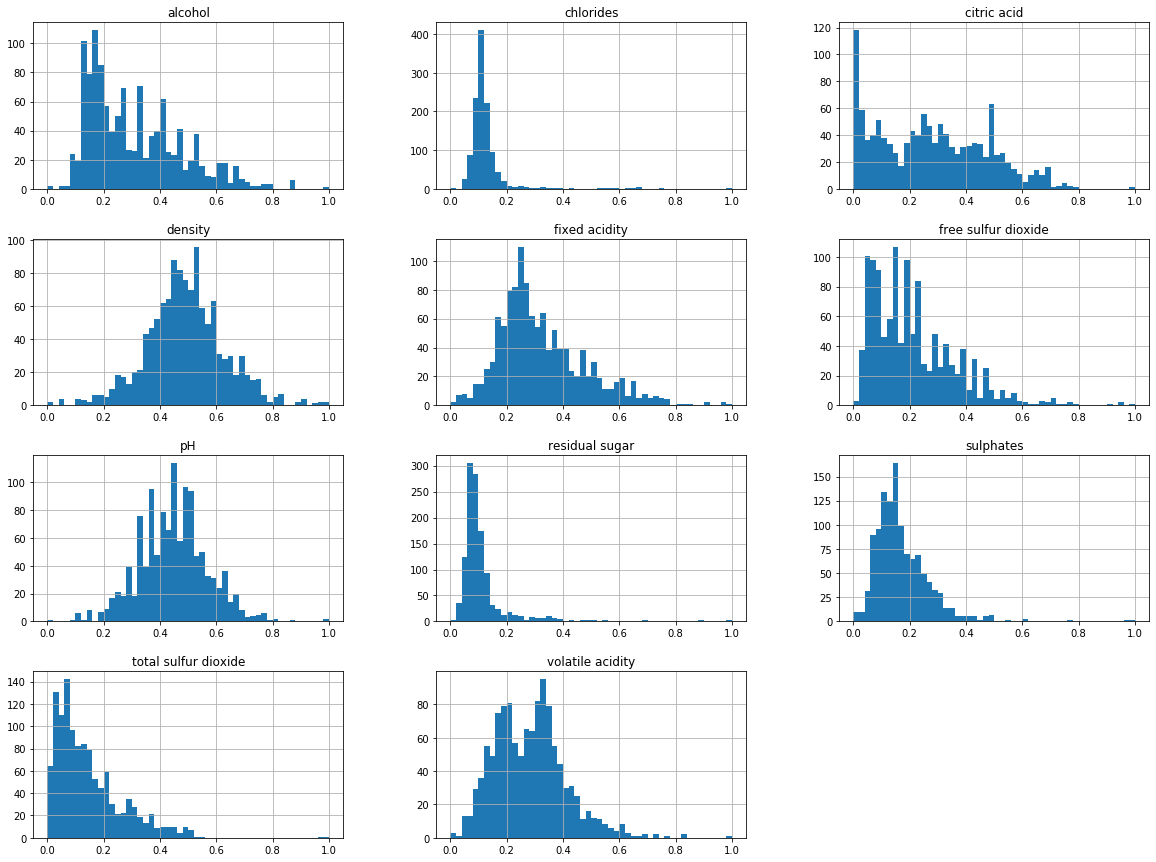

In [20]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [22]:
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.035701,1.170139,-0.827972,-0.445352,0.057636,-0.012496,0.459864,-0.136917,-0.770684,0.911952,-0.756601
1,-0.425194,-0.547349,0.097514,-0.309962,-0.254119,0.270206,0.548141,0.224783,0.590788,-0.106087,-0.850481
2,0.035701,0.161456,-1.187883,-0.377657,-0.108633,-0.577901,-0.746586,0.448185,-0.576188,-1.237242,-0.756601


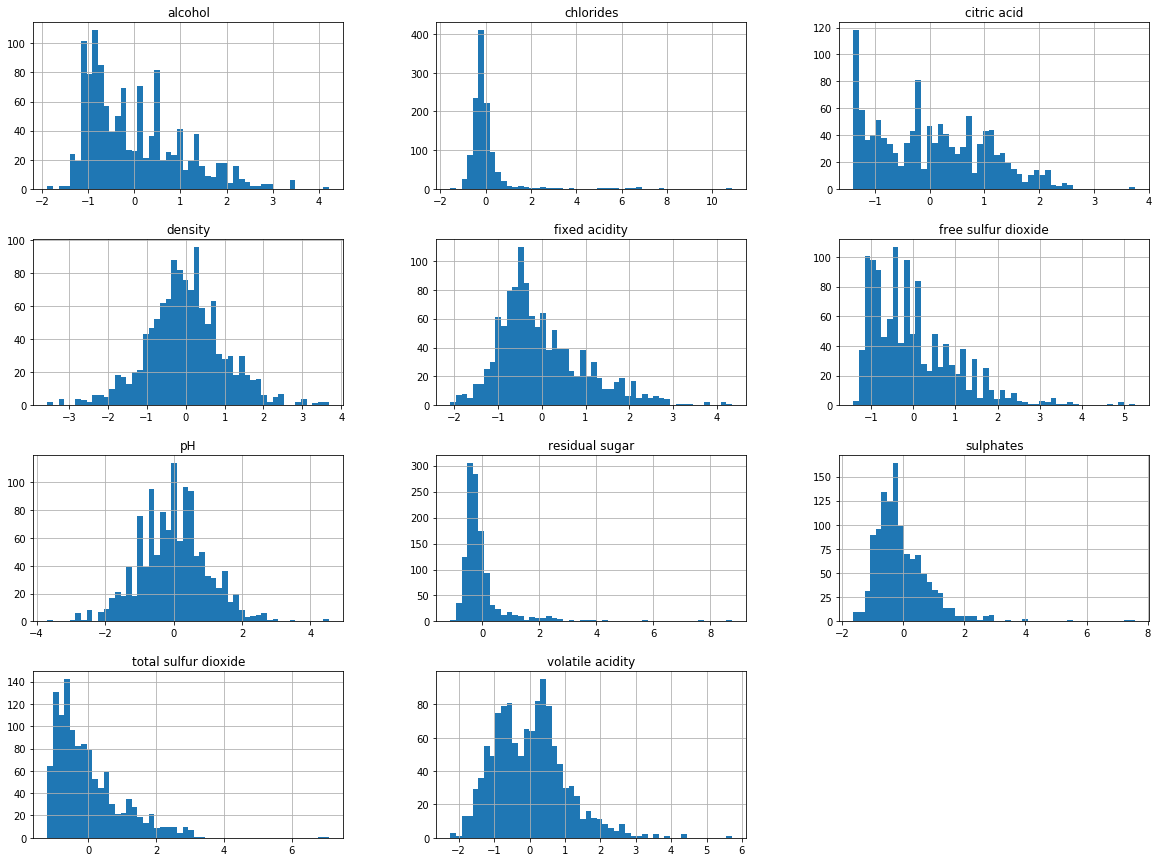

In [23]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
# Import scores 
from sklearn.metrics import accuracy_score
acc_scores = {}


In [25]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}\n")
    return model

In [26]:
# First model Svc_linear
from sklearn.svm import SVC, NuSVC, LinearSVC
Svc_linear = SVC(kernel='linear', C=1)
model1 = models(Svc_linear, X_train_std, y_train, X_test_std, y_test, 'Svc_linear')


Acc_score of Svc_linear: 0.5975



In [27]:
# Second model SVC_rbf
SVC_rbf = SVC()
model2 = models(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')


Acc_score of SVC_rbf: 0.63



In [28]:
# Third model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model3 = models(rf, X_train_std, y_train, X_test_std, y_test, 'Ran_for_clf')


Acc_score of Ran_for_clf: 0.69



In [29]:
# Fourth model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model4 = models(log_reg, X_train_std, y_train, X_test_std, y_test, 'Log_Reg')


Acc_score of Log_Reg: 0.635



C:\Users\User\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'Testing Accuracy')

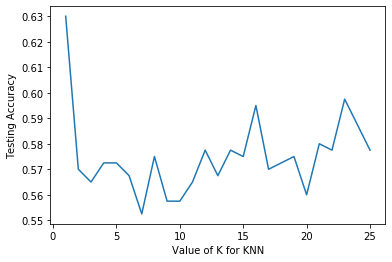

In [30]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [31]:
# 5th model KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)
model5 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')


Acc_score of KNN: 0.5775



In [32]:
# 6th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model6 = models(xg_class, X_train_std, y_train, X_test_std, y_test, 'xg')


Acc_score of xg: 0.6225



In [33]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model7 = models(sgdclass, X_train_std, y_train, X_test_std, y_test, 'sgdclass')


Acc_score of sgdclass: 0.5525



In [34]:
# 8th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model8 = models(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_class')


Acc_score of Dec_tree_class: 0.635



In [35]:
# 9th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model9 = models(bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, 'bag_class_extra_tree')

Acc_score of bag_class_extra_tree: 0.6525



In [36]:
# 10th model AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
Ada =AdaBoostClassifier()
model10 = models(Ada, X_train_std, y_train, X_test_std, y_test, 'Ada')

Acc_score of Ada: 0.5725



In [37]:
# Lets see the results of models
df_results = pd.DataFrame({'Models': list(acc_scores.keys()),
                          'Acc_Scores': list(acc_scores.values())})
df_results

,Models,Acc_Scores
0,Svc_linear,0.5975
1,SVC_rbf,0.6300
2,Ran_for_clf,0.6900
3,Log_Reg,0.6350
4,KNN,0.5775
5,xg,0.6225
6,sgdclass,0.5525
7,Dec_tree_class,0.6350
8,bag_class_extra_tree,0.6525
9,Ada,0.5725


[Text(0, 0.5, 'Acc_Scores')]

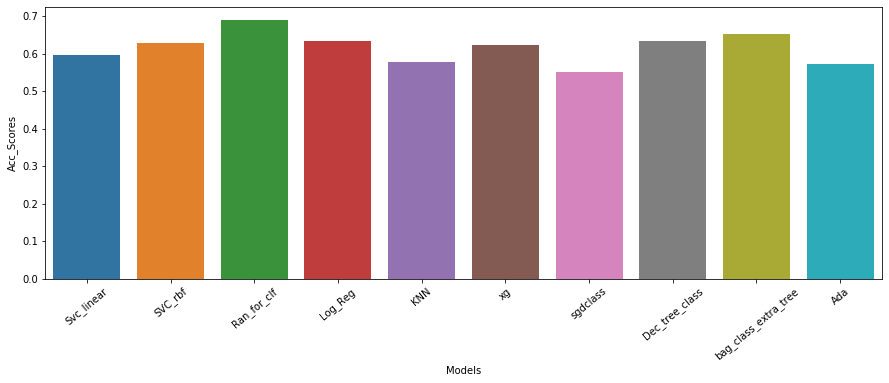

In [38]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "Acc_Scores", data = df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "Acc_Scores")

In [39]:
# Let see which model gives the best result
print(f"The model with best Acc_score is {max(acc_scores, key=acc_scores.get)} and it's Acc_score is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best Acc_score is Ran_for_clf and it's Acc_score is 0.690.


In [40]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
1109,6,5
1032,5,5
1002,7,7
487,6,5
979,5,6


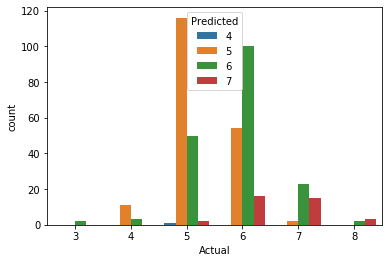

In [41]:
plot = sns.countplot(x = "Actual", hue='Predicted',data = df_check)

# THE END